# <font color=898AC4> **Telecom X - Análisis de Evasión de Clientes**
---

### <font color=C0C9EE> 📌 1. Extracción de los datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/lMVPl/analisis-evasion-de-clientes/refs/heads/main/datos.json"

data = pd.read_json(url)

data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### <font color=C0C9EE> 🔧 2. Transformación de los datos

##### <font color=C0C9EE> 2.1 Comprendiendo estructura de los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
data.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##### <font color=C0C9EE> 2.2 Normalización de datos

In [ ]:
# Normalizar la sección 'customer'
customer_df = pd.json_normalize(data['customer'])
customer_df.columns = ['customer.' + col for col in customer_df.columns] # Prefija para evitar conflictos
# Normalizar la sección 'phone'
phone_df = pd.json_normalize(data['phone'])
phone_df.columns = ['phone.' + col for col in phone_df.columns]

# Normalizar la sección 'internet'
internet_df = pd.json_normalize(data['internet'])
internet_df.columns = ['internet.' + col for col in internet_df.columns]

# Normalizar la sección 'account'
account_df = pd.json_normalize(data['account'])
account_df.columns = ['account.' + col for col in account_df.columns]

# Unir todo de nuevo. Primero, las columnas de nivel superior.
df_flat = data[['customerID', 'Churn']].copy()

# Luego, unir las secciones normalizadas
df_flat = pd.concat([df_flat, customer_df, phone_df, internet_df, account_df], axis=1)

# Renombrar la columna 'customer.gender' para que sea solo 'gender'
df_flat.rename(columns={'customer.gender': 'gender'}, inplace=True)

# Mostrar las primeras filas y los nombres de las columnas para verificar
print("Nombres de las columnas en el DataFrame aplanado:")
print(df_flat.columns)
print("\nPrimeras filas del DataFrame aplanado:")
print(df_flat.head(2))

Nombres de las columnas en el DataFrame aplanado:
Index(['customerID', 'Churn', 'gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Primeras filas del DataFrame aplanado:
   customerID Churn  gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No  Female                       0              Yes   
1  0003-MKNFE    No    Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes

In [ ]:
df_flat

,customerID,Churn,gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##### <font color=C0C9EE> 2.3 Comprobación de incoherencias en los datos

###### <font color=C0C9EE> Inspección de Valores en Columnas Categóricas

In [ ]:
# -- CUSTOMER --
# 1. gender
print("Valores únicos en 'gender':", df_flat['gender'].unique(), "\nConteo de valores:", df_flat['gender'].value_counts())
# 2. Partner
print("\nValores únicos en 'Partner':", df_flat['customer.Partner'].unique(), "\nConteo de valores:", df_flat['customer.Partner'].value_counts())
# 3. Dependents
print("\nValores únicos en 'Dependents':", df_flat['customer.Dependents'].unique(), "\nConteo de valores:", df_flat['customer.Dependents'].value_counts())

Valores únicos en 'gender': ['Female' 'Male'] 
Conteo de valores: gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos en 'Partner': ['Yes' 'No'] 
Conteo de valores: customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos en 'Dependents': ['Yes' 'No'] 
Conteo de valores: customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64


In [ ]:
# -- PHONE --
# 4. PhoneService
print("\nValores únicos en 'PhoneService':", df_flat['phone.PhoneService'].unique(), "\nConteo de valores:", df_flat['phone.PhoneService'].value_counts())
# 5. MultipleLines
print("\nValores únicos en 'MultipleLines':", df_flat['phone.MultipleLines'].unique(), "\nConteo de valores:", df_flat['phone.MultipleLines'].value_counts())


Valores únicos en 'PhoneService': ['Yes' 'No'] 
Conteo de valores: phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos en 'MultipleLines': ['No' 'Yes' 'No phone service'] 
Conteo de valores: phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


In [ ]:
# -- INTERNET --
# 6. InternetService
print("\nValores únicos en 'InternetService':", df_flat['internet.InternetService'].unique(), "\nConteo de valores:", df_flat['internet.InternetService'].value_counts())
# 7. OnlineSecurity
print("\nValores únicos en 'OnlineSecurity':", df_flat['internet.OnlineSecurity'].unique(), "\nConteo de valores:", df_flat['internet.OnlineSecurity'].value_counts())
# 8. OnlineBackup
print("\nValores únicos en 'OnlineBackup':", df_flat['internet.OnlineBackup'].unique(), "\nConteo de valores:", df_flat['internet.OnlineBackup'].value_counts())
# 9. DeviceProtection
print("\nValores únicos en 'DeviceProtection':", df_flat['internet.DeviceProtection'].unique(), "\nConteo de valores:", df_flat['internet.DeviceProtection'].value_counts())
# 10. TechSupport
print("\nValores únicos en 'TechSupport':", df_flat['internet.TechSupport'].unique(), "\nConteo de valores:", df_flat['internet.TechSupport'].value_counts())
# 11. StreamingTV
print("\nValores únicos en 'StreamingTV':", df_flat['internet.StreamingTV'].unique(), "\nConteo de valores:", df_flat['internet.StreamingTV'].value_counts())
# 12. StreamingMovies
print("\nValores únicos en 'StreamingMovies':", df_flat['internet.StreamingMovies'].unique(), "\nConteo de valores:", df_flat['internet.StreamingMovies'].value_counts())


Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No'] 
Conteo de valores: internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Valores únicos en 'OnlineSecurity': ['No' 'Yes' 'No internet service'] 
Conteo de valores: internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Valores únicos en 'OnlineBackup': ['Yes' 'No' 'No internet service'] 
Conteo de valores: internet.OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service'] 
Conteo de valores: internet.DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

Valores únicos en 'TechSupport': ['Yes' 'No' 'No internet service'] 
Conteo de valores: internet.TechSupport
No              

In [ ]:
# -- ACCOUNT --
# 13. Contract
print("\nValores únicos en 'Contract':", df_flat['account.Contract'].unique(), "\nConteo de valores:", df_flat['account.Contract'].value_counts())
# 14. PaperlessBilling
print("\nValores únicos en 'PaperlessBilling':", df_flat['account.PaperlessBilling'].unique(), "\nConteo de valores:", df_flat['account.PaperlessBilling'].value_counts())
# 15. PaymentMethod
print("\nValores únicos en 'PaymentMethod':", df_flat['account.PaymentMethod'].unique(), "\nConteo de valores:", df_flat['account.PaymentMethod'].value_counts())
# 16. DeviceProtection
print("\nValores únicos en 'DeviceProtection':", df_flat['internet.DeviceProtection'].unique(), "\nConteo de valores:", df_flat['internet.DeviceProtection'].value_counts())


Valores únicos en 'Contract': ['One year' 'Month-to-month' 'Two year'] 
Conteo de valores: account.Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

Valores únicos en 'PaperlessBilling': ['Yes' 'No'] 
Conteo de valores: account.PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64

Valores únicos en 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] 
Conteo de valores: account.PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service'] 
Conteo de valores: internet.DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64


In [ ]:
# -- OTHERS --
# 17. Churn
print("\nValores únicos en 'Churn':", df_flat['Churn'].unique(), "\nConteo de valores:", df_flat['Churn'].value_counts(), "\nValores nulos:", df_flat['Churn'].isnull().sum())


Valores únicos en 'Churn': ['No' 'Yes' ''] 
Conteo de valores: Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64 
Valores nulos: 0


###### <font color=C0C9EE> Inspección de Valores en Columnas Numéricas

In [ ]:
# -- CUSTOMER --
# 18. SeniorCitizen
print("\nValores únicos en 'SeniorCitizen':", df_flat['customer.SeniorCitizen'].unique(), "\nConteo de valores:", df_flat['customer.SeniorCitizen'].value_counts(), "\nTipo de dato actual:", df_flat['customer.SeniorCitizen'].dtype)
# 19. tenure
print("\nValores únicos en 'tenure' (primeros 10 si hay muchos):\n", df_flat['customer.tenure'].unique()[:10])
print("Tipo de dato actual:", df_flat['customer.tenure'].dtype)
print("Descripción estadística:\n", df_flat['customer.tenure'].describe())
print("Valores nulos:", df_flat['customer.tenure'].isnull().sum())



Valores únicos en 'SeniorCitizen': [0 1] 
Conteo de valores: customer.SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64 
Tipo de dato actual: int64

Valores únicos en 'tenure' (primeros 10 si hay muchos):
 [ 9  4 13  3 71 63  7 65 54 72]
Tipo de dato actual: int64
Descripción estadística:
 count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer.tenure, dtype: float64
Valores nulos: 0


In [ ]:
# -- ACCOUNT --
# 20. Charges.Monthly
print("Tipo de dato actual en 'Charges.Monthly':", df_flat['account.Charges.Monthly'].dtype)
print("Descripción estadística:\n", df_flat['account.Charges.Monthly'].describe())
print("\nValores nulos:", df_flat['account.Charges.Monthly'].isnull().sum())
# 21. Charges.Total
print("\nTipo de dato actual en 'Charges.Total':", df_flat['account.Charges.Total'].dtype)
# Si es 'object', imprime los valores únicos para ver qué hay además de números
if df_flat['account.Charges.Total'].dtype == 'object':
    print("Primeros 10 valores únicos (si es object):\n", df_flat['account.Charges.Total'].unique()[:10])

# Intentar convertir a numérico, coercing errores (valores no numéricos) a NaN.
df_flat['account.Charges.Total'] = pd.to_numeric(df_flat['account.Charges.Total'], errors='coerce')

# Rellenar los NaN (que ahora incluyen los " " o valores no numéricos originales)
# Para TotalCharges, 0 es a menudo apropiado para clientes nuevos sin cargos totales.
df_flat['account.Charges.Total'] = df_flat['account.Charges.Total'].fillna(0)

print("Tipo de dato después de limpieza:", df_flat['account.Charges.Total'].dtype)
print("Descripción estadística después de limpieza:\n", df_flat['account.Charges.Total'].describe())
print("\nValores nulos después de limpieza:", df_flat['account.Charges.Total'].isnull().sum())

Tipo de dato actual en 'Charges.Monthly': float64
Descripción estadística:
 count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: account.Charges.Monthly, dtype: float64

Valores nulos: 0

Tipo de dato actual en 'Charges.Total': object
Primeros 10 valores únicos (si es object):
 ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']
Tipo de dato después de limpieza: float64
Descripción estadística después de limpieza:
 count    7267.000000
mean     2277.182035
std      2268.648587
min         0.000000
25%       396.200000
50%      1389.200000
75%      3778.525000
max      8684.800000
Name: account.Charges.Total, dtype: float64

Valores nulos después de limpieza: 0


In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   gender                     7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df_flat

,customerID,Churn,gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##### <font color=C0C9EE> 2.4 Creación de columna para calcular el valor diario de la facturación mensual

In [ ]:
# Dividimos el 'account.Charges.Monthly' entre 30 días para obtener el valor diario
# Usamos .round(2) para redondear a dos decimales, como es común en valores monetarios.
df_flat['cuentas_diarias'] = (df_flat['account.Charges.Monthly'] / 30).round(2)

# Verificamos la nueva columna
print("Primeras 5 filas con la nueva columna 'cuentas_diarias':")
print(df_flat[['account.Charges.Monthly', 'cuentas_diarias']].head())

print("\nEstadísticas descriptivas de 'cuentas_diarias':")
print(df_flat['cuentas_diarias'].describe())

Primeras 5 filas con la nueva columna 'cuentas_diarias':
   account.Charges.Monthly  cuentas_diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80

Estadísticas descriptivas de 'cuentas_diarias':
count    7267.000000
mean        2.157292
std         1.004407
min         0.610000
25%         1.180000
50%         2.340000
75%         2.995000
max         3.960000
Name: cuentas_diarias, dtype: float64


##### <font color=C0C9EE> 2.5 Estandarización y transformación de datos

###### <font color=C0C9EE> Limpiar y mapear 'Churn' a 0 y 1

In [ ]:
# Solo procede si 'Churn' no es ya de tipo numérico (int o float)
if df_flat['Churn'].dtype == 'object':
    print("La columna 'Churn' es de tipo 'object'. Procediendo con limpieza y mapeo.")
    # 1. Limpiar y mapear 'Churn' a 0 y 1. Los valores no válidos se convertirán a NaN.
    df_flat['Churn'] = df_flat['Churn'].astype(str).str.lower().str.strip().map({'no': 0, 'yes': 1})

    # 2. Eliminar las filas donde 'Churn' es NaN.
    filas_con_nan_churn = df_flat['Churn'].isnull().sum()
    if filas_con_nan_churn > 0:
        print(f"Se encontraron {filas_con_nan_churn} filas con valores NaN en 'Churn'. Eliminando estas filas...")
        df_flat.dropna(subset=['Churn'], inplace=True)
        print("Filas con NaN en 'Churn' eliminadas.")
    else:
        print("No se encontraron valores NaN en 'Churn' después del mapeo.")

    # 3. Convertir 'Churn' a tipo entero (int) para asegurar que sea 0 o 1.
    df_flat['Churn'] = df_flat['Churn'].astype(int)
    print("Columna 'Churn' convertida a numérica (0/1).")
else:
    print("La columna 'Churn' ya es de tipo numérico. Limpieza y el mapeo realizados.")

print("\n--- Verificación final de la columna 'Churn' ---")
print("Valores únicos de 'Churn':", df_flat['Churn'].unique())
print("Conteo de valores de 'Churn':\n", df_flat['Churn'].value_counts())
print("Tipo de dato de 'Churn':", df_flat['Churn'].dtype)

La columna 'Churn' es de tipo 'object'. Procediendo con limpieza y mapeo.
Se encontraron 224 filas con valores NaN en 'Churn'. Eliminando estas filas...
Filas con NaN en 'Churn' eliminadas.
Columna 'Churn' convertida a numérica (0/1).

--- Verificación final de la columna 'Churn' ---
Valores únicos de 'Churn': [0 1]
Conteo de valores de 'Churn':
 Churn
0    5174
1    1869
Name: count, dtype: int64
Tipo de dato de 'Churn': int64


In [ ]:
df_flat

,customerID,Churn,gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


###### <font color=C0C9EE> Transformación de columnas categóricas a numéricas

> Muchos algoritmos de machine learning no pueden trabajar directamente con texto. Algunas columnas categóricas necesitan convertirse a un formato numérico. La técnica más común y efectiva para esto es One-Hot Encoding.



In [ ]:
# Columnas categóricas a las que aplicaremos One-Hot Encoding
# Excluimos 'customerID' ya que es un identificador único y no una característica.
# Excluimos 'Churn' por ahora, ya que es tu variable objetivo y la trataremos por separado si es necesario.

categorical_cols = [
    'gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_flat, columns=categorical_cols, drop_first=True, dtype=int)

# 'drop_first=True' evita la multicolinealidad al eliminar una de las categorías (ej. si es 'male', no es 'female')
# 'dtype=int' asegura que las nuevas columnas sean enteros (0 o 1)

print("Primeras filas del DataFrame después de One-Hot Encoding:")
print(df_encoded.head())
print("\nNuevas columnas creadas por One-Hot Encoding:")
print([col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols)])

Primeras filas del DataFrame después de One-Hot Encoding:
   customerID  Churn  customer.SeniorCitizen  customer.tenure  \
0  0002-ORFBO      0                       0                9   
1  0003-MKNFE      0                       0                9   
2  0004-TLHLJ      1                       0                4   
3  0011-IGKFF      1                       1               13   
4  0013-EXCHZ      1                       1                3   

   account.Charges.Monthly  account.Charges.Total  cuentas_diarias  \
0                     65.6                 593.30             2.19   
1                     59.9                 542.40             2.00   
2                     73.9                 280.85             2.46   
3                     98.0                1237.85             3.27   
4                     83.9                 267.40             2.80   

   gender_Male  customer.Partner_Yes  customer.Dependents_Yes  ...  \
0            0                     1                        

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7043 non-null   object 
 1   Churn                                          7043 non-null   int64  
 2   customer.SeniorCitizen                         7043 non-null   int64  
 3   customer.tenure                                7043 non-null   int64  
 4   account.Charges.Monthly                        7043 non-null   float64
 5   account.Charges.Total                          7043 non-null   float64
 6   cuentas_diarias                                7043 non-null   float64
 7   gender_Male                                    7043 non-null   int64  
 8   customer.Partner_Yes                           7043 non-null   int64  
 9   customer.Dependents_Yes                        7043 non-n

In [ ]:
df_encoded

,customerID,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,gender_Male,customer.Partner_Yes,customer.Dependents_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,0,9,65.60,593.30,2.19,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,0,9,59.90,542.40,2.00,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,4,73.90,280.85,2.46,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,1,13,98.00,1237.85,3.27,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,1,3,83.90,267.40,2.80,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,13,55.15,742.90,1.84,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7263,9992-RRAMN,1,0,22,85.10,1873.70,2.84,1,1,0,...,0,0,0,1,0,0,1,0,1,0
7264,9992-UJOEL,0,0,2,50.30,92.75,1.68,1,0,0,...,0,0,0,0,0,0,1,0,0,1
7265,9993-LHIEB,0,0,67,67.85,4627.65,2.26,1,1,1,...,0,0,0,1,0,1,0,0,0,1


###### <font color=C0C9EE> Estandarización de columnas numéricas (Feature Scaling)

> Muchos algoritmos de machine learning son sensibles a la escala de las características. Si una columna tiene valores mucho más grandes que otra, podría dominar la optimización del modelo. Esta estandarización escala los datos a un rango común.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas a estandarizar
# Excluimos 'customer.SeniorCitizen' ya que es un indicador binario (0 o 1)
# y no necesita ser escalada.
numeric_cols = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'cuentas_diarias'
]

# Inicializar el estandarizador
scaler = StandardScaler()

# Ajustar y transformar las columnas numéricas
# La asignación directa asegura que los cambios se guarden en el DataFrame original.
df_flat[numeric_cols] = scaler.fit_transform(df_flat[numeric_cols])

print("\nPrimeras filas del DataFrame después de la estandarización de columnas numéricas:")
print(df_flat[numeric_cols].head())

print("\nEstadísticas descriptivas de las columnas numéricas estandarizadas:")
print(df_flat[numeric_cols].describe())


Primeras filas del DataFrame después de la estandarización de columnas numéricas:
   customer.tenure  account.Charges.Monthly  account.Charges.Total  \
0        -0.951682                 0.027862              -0.744026   
1        -0.951682                -0.161583              -0.766482   
2        -1.155283                 0.303720              -0.881874   
3        -0.788800                 1.104706              -0.459662   
4        -1.196004                 0.636080              -0.887808   

   cuentas_diarias  
0         0.031231  
1        -0.158198  
2         0.300419  
3         1.107982  
4         0.639396  

Estadísticas descriptivas de las columnas numéricas estandarizadas:
       customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count     7.043000e+03             7.043000e+03           7.043000e+03   
mean     -2.824818e-17            -6.658501e-17          -4.237228e-17   
std       1.000071e+00             1.000071e+00           1.000071e+00   
min  

### <font color=C0C9EE> 📊 3. Carga y análisis

##### <font color=C0C9EE> 3.1 Análisis descriptivo de los datos

In [ ]:
df_flat.describe()

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,0.265370,0.162147,-2.824818e-17,-6.658501e-17,-4.237228e-17,-1.150105e-16
std,0.441561,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00,-1.544018e+00
25%,0.000000,0.000000,-9.516817e-01,-9.725399e-01,-8.299464e-01,-9.757320e-01
50%,0.000000,0.000000,-1.372744e-01,1.857327e-01,-3.905282e-01,1.807794e-01
75%,1.000000,0.000000,9.214551e-01,8.338335e-01,6.648034e-01,8.288246e-01
max,1.000000,1.000000,1.613701e+00,1.794352e+00,2.825806e+00,1.795907e+00


##### <font color=C0C9EE> 3.2 Creación del Gráfico de proporción de "Churn"

Conteo y Proporción de Clientes por Estado de Churn:
                                Conteo  Porcentaje
Churn                                             
No se dio de baja (Permaneció)    5174       73.46
Se dio de baja (Churn)            1869       26.54


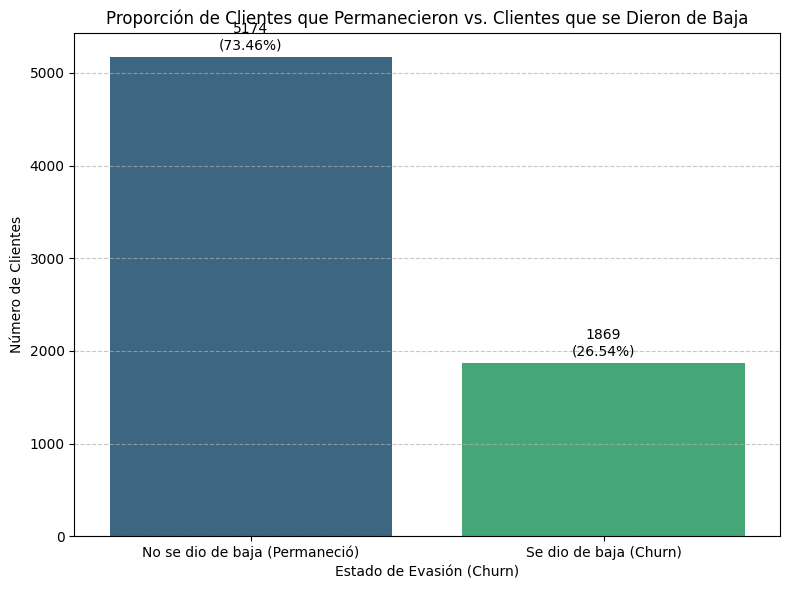

In [ ]:
# Contar la frecuencia de cada valor en la columna 'Churn'
churn_counts = df_flat['Churn'].value_counts()

# Mapear 0 y 1 a etiquetas más descriptivas para el gráfico
churn_labels = {0: 'No se dio de baja (Permaneció)', 1: 'Se dio de baja (Churn)'}
churn_counts.index = churn_counts.index.map(churn_labels)

# Calcular las proporciones/porcentajes
total_clientes = churn_counts.sum()
churn_proportions = churn_counts / total_clientes * 100

print("Conteo y Proporción de Clientes por Estado de Churn:")
print(pd.DataFrame({'Conteo': churn_counts, 'Porcentaje': churn_proportions.round(2)}))

# Crear el gráfico
plt.figure(figsize=(8, 6)) # Define el tamaño del gráfico
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='viridis', legend=False)

# Añadir etiquetas de valor en las barras
for index, value in enumerate(churn_counts.values):
    plt.text(index, value + 50, f'{value}\n({churn_proportions.iloc[index]:.2f}%)',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Proporción de Clientes que Permanecieron vs. Clientes que se Dieron de Baja') # Título del gráfico
plt.xlabel('Estado de Evasión (Churn)') # Etiqueta del eje X
plt.ylabel('Número de Clientes') # Etiqueta del eje Y
plt.xticks(rotation=0) # Asegura que las etiquetas del eje X no roten si son cortas
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave
plt.tight_layout() # Ajusta el diseño para evitar recortes
plt.show() # Muestra el gráfico

##### <font color=C0C9EE> 3.3 Recuento de evasión por variables categóricas

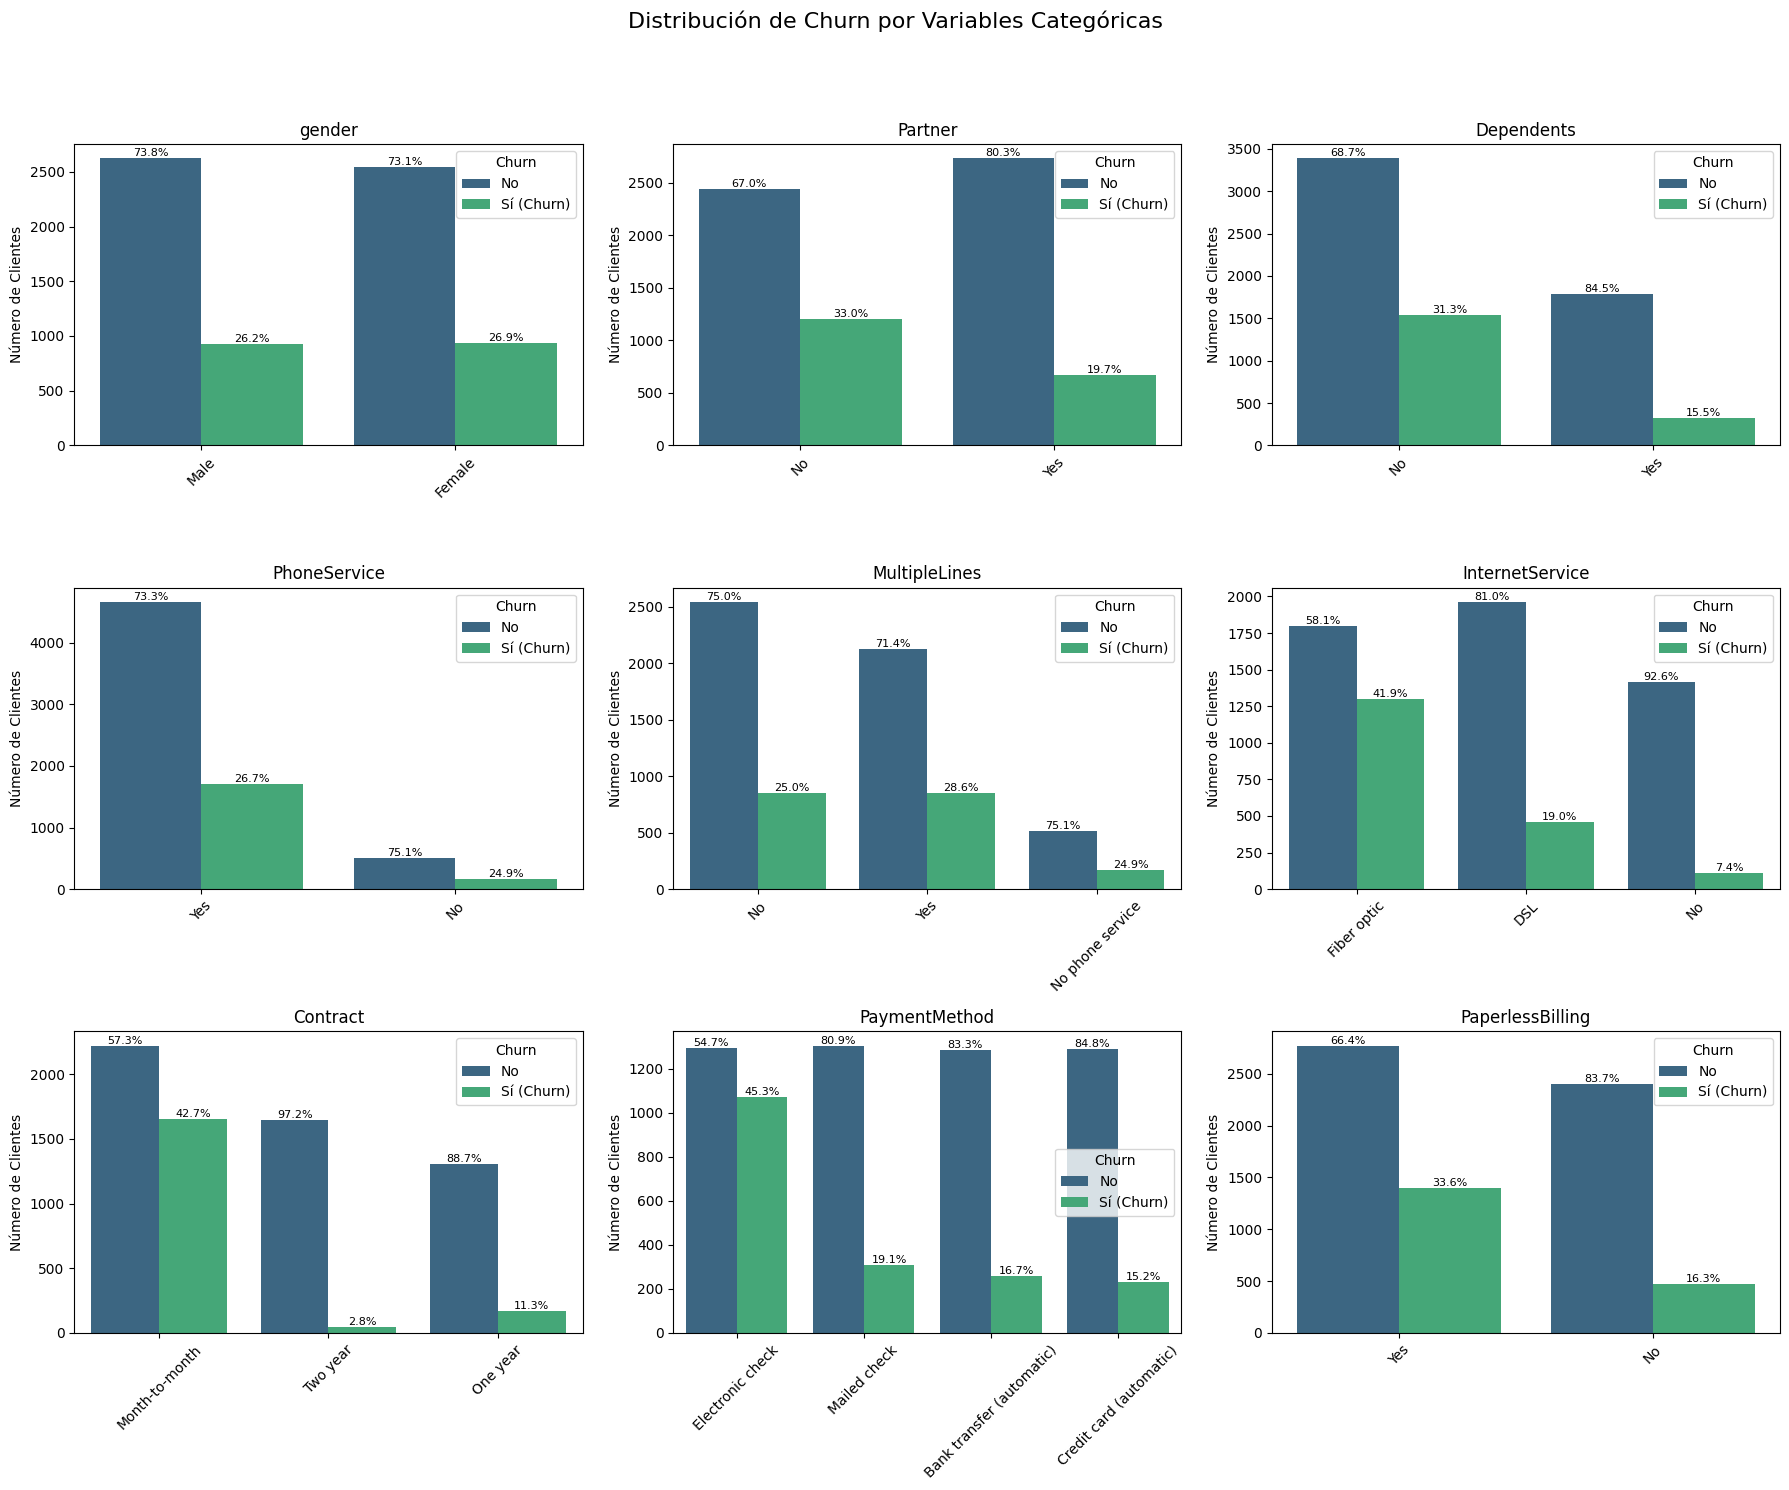

In [ ]:
# --- Lista de columnas categóricas a explorar ---
categorical_features = [
    'gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod',
    'account.PaperlessBilling'
]

# Configuración para las etiquetas de Churn
churn_labels_map = {0: 'No', 1: 'Sí (Churn)'}

# --- Configuración de la cuadrícula de gráficos ---
n_cols = 3 # Número de gráficos por fila
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # Calcula el número de filas necesario

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Tamaño global de la figura

# Iterar sobre cada característica categórica y crear un gráfico en la cuadrícula
for i, col in enumerate(categorical_features):
    ax = plt.subplot(n_rows, n_cols, i + 1) # Selecciona el subplot actual

    # Crear el gráfico de conteo con 'Churn' como hue
    sns.countplot(data=df_flat, x=col, hue='Churn', palette='viridis', ax=ax, order=df_flat[col].value_counts().index)

    # Título y etiquetas
    ax.set_title(f'{col.replace("customer.", "").replace("account.", "").replace("phone.", "").replace("internet.", "")}')
    ax.set_xlabel('') # Elimina la etiqueta del eje X para mayor limpieza
    ax.set_ylabel('Número de Clientes')
    ax.tick_params(axis='x', rotation=45) # Rota las etiquetas del eje X para que no se superpongan

    # Ajustar las etiquetas de la leyenda para que sean 'No' y 'Sí (Churn)'
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=[churn_labels_map[int(label)] for label in labels], title='Churn')

    # Calcular los porcentajes para añadir a las barras
    counts = df_flat.groupby([col, 'Churn']).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0) * 100

    # Añadir texto con porcentajes en las barras
    for container in ax.containers:
        for i_patch, patch in enumerate(container.patches):
            height = patch.get_height()
            if height > 0:
                # Obtenemos el nombre de la categoría del eje X
                category_str_name = ax.get_xticklabels()[int(patch.get_x() + 0.5)].get_text()

                # Inferimos si es la barra de Churn=0 o Churn=1
                churn_value_for_this_bar = 0 if container is ax.containers[0] else 1

                if category_str_name in proportions.index and churn_value_for_this_bar in proportions.columns:
                    percentage = proportions.loc[category_str_name, churn_value_for_this_bar]
                    ax.text(
                        patch.get_x() + patch.get_width() / 2,
                        height,
                        f'{percentage:.1f}%',
                        ha='center', va='bottom', fontsize=8, color='black'
                    )

plt.suptitle('Distribución de Churn por Variables Categóricas', fontsize=16, y=1.02) # Título general de la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el diseño y deja espacio para el título superior
plt.show()

##### <font color=C0C9EE> 3.4 Explorando la distribución de Churn por variables numéricas

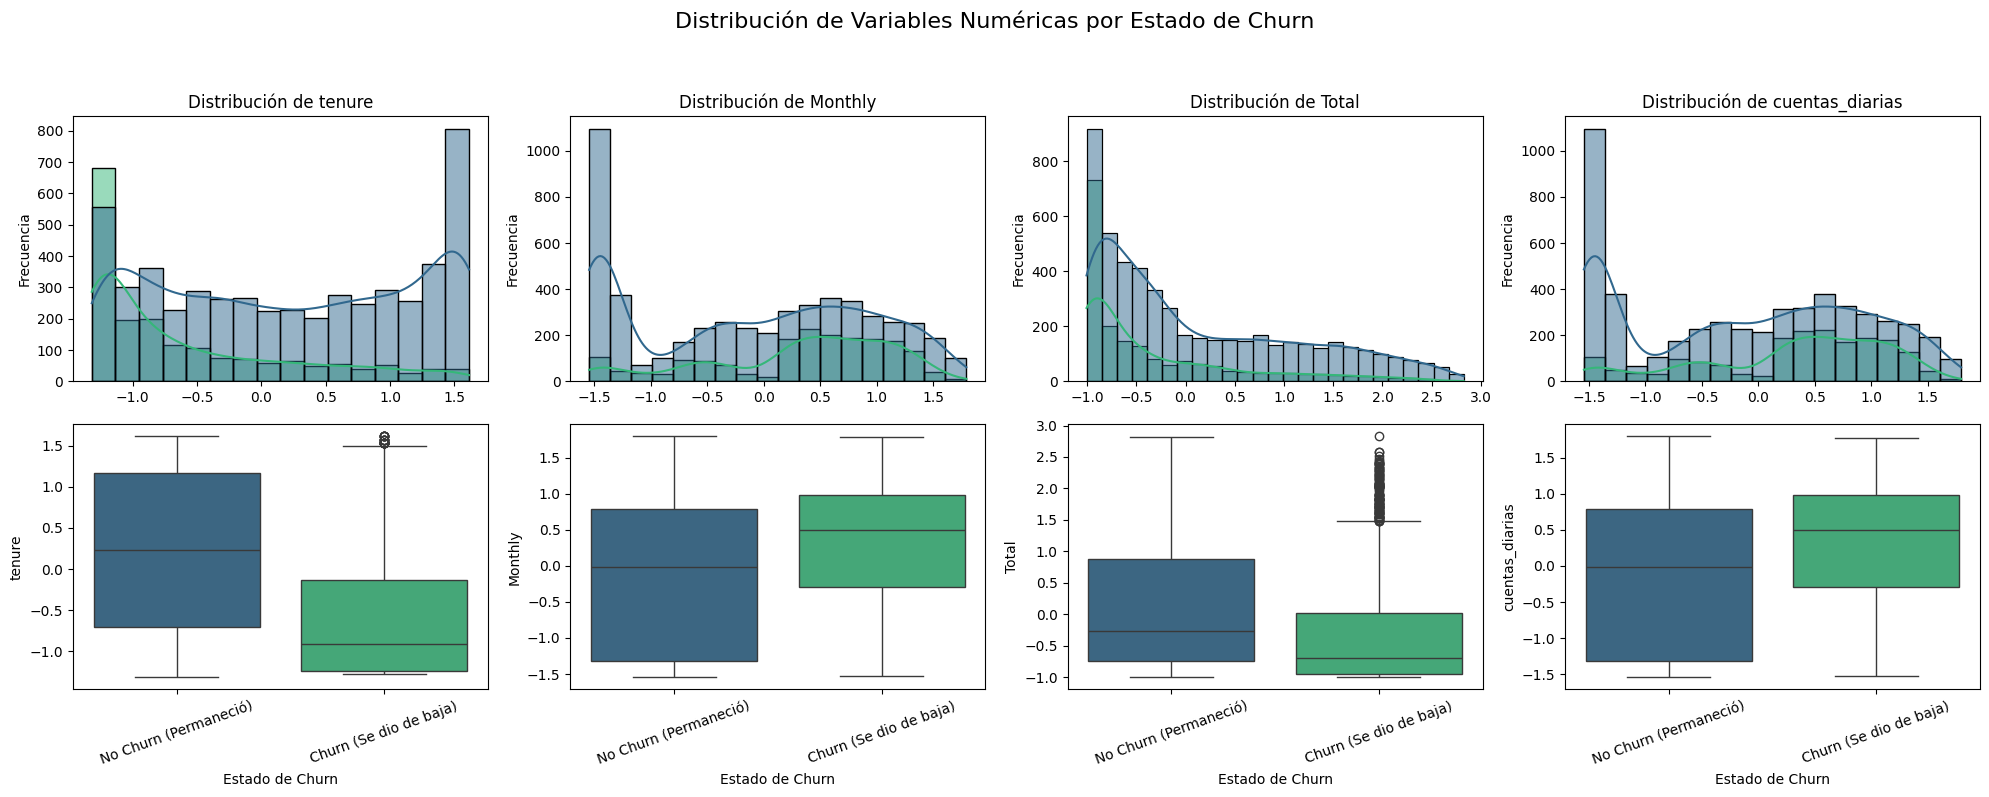

In [ ]:
# Lista de columnas numéricas a explorar
numeric_features = [
    'customer.tenure',          # Tiempo de contrato/antigüedad
    'account.Charges.Monthly',  # Gasto mensual
    'account.Charges.Total',    # Gasto total
    'cuentas_diarias'           # Gasto diario (la que creamos)
]

# Etiquetas para la leyenda de Churn
churn_labels = {0: 'No Churn (Permaneció)', 1: 'Churn (Se dio de baja)'}

# Configuración de la cuadrícula de gráficos
# Creamos una figura con 2 filas para Histograma y Boxplot por cada variable
n_cols = len(numeric_features)
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(n_cols * 5, 8))
fig.suptitle('Distribución de Variables Numéricas por Estado de Churn', fontsize=16, y=1.02)


# Iterar sobre cada característica numérica
for i, col in enumerate(numeric_features):
    # Histograma / Gráfico de Densidad (KDE)
    sns.histplot(
        data=df_flat,
        x=col,
        hue='Churn',
        kde=True, # Muestra también la estimación de densidad del kernel
        palette='viridis',
        ax=axes[0, i], # Fila 0, columna i
        common_norm=False, # Normaliza cada distribución de hue por separado
        legend=False # La leyenda la pondremos una sola vez en el boxplot para ahorrar espacio
    )
    axes[0, i].set_title(f'Distribución de {col.replace("customer.", "").replace("account.Charges.", "")}')
    axes[0, i].set_xlabel('') # Elimina la etiqueta X para limpieza
    axes[0, i].set_ylabel('Frecuencia')


    # Boxplot
    sns.boxplot(
        data=df_flat,
        x='Churn',
        y=col,
        hue='Churn', # Asignar 'x' a 'hue'
        palette='viridis',
        ax=axes[1, i], # Fila 1, columna i
        legend=False # Desactivar la leyenda explícitamente
    )
    axes[1, i].set_xlabel('Estado de Churn')
    axes[1, i].set_ylabel(col.replace("customer.", "").replace("account.Charges.", ""))
    axes[1, i].set_xticks([0, 1])
    axes[1, i].set_xticklabels([churn_labels[0], churn_labels[1]], rotation=20, ha='center')

# Ajustar leyenda manualmente una vez para todos los gráficos si se necesita una leyenda general
# (Para los gráficos de histplot, es mejor poner una leyenda compartida si common_norm=False)
# sns.histplot crea una leyenda, si se omite legend=False.

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el diseño para el título principal
plt.show()

### <font color=C0C9EE> 📄 4. Informe final

##### **Informe: Análisis de Evasión de Clientes (Churn)**

**Fecha:** 23 de junio de 2025

---

#### **◾ Introducción**

Este informe aborda el desafío Telecom X del parte del proyecto **"Churn de Clientes"**, un factor crítico para la rentabilidad de la empresa. El objetivo es identificar los **factores clave** que impulsan la evasión de clientes para desarrollar estrategias de retención efectivas y mitigar la pérdida de ingresos.

---

#### **◾ Limpieza y tratamiento de datos**

La preparación de datos fue fundamental para asegurar la fiabilidad del análisis. Los pasos clave incluyeron:

* **Normalización de JSON Anidado:** Se aplanaron las estructuras de datos anidadas (`customer`, `phone`, `internet`, `account`) en el DataFrame, asegurando prefijos correctos (`customer.gender`, `account.Charges.Monthly`) para evitar duplicidades y facilitar el acceso a la información.
* **Limpieza de Categóricas:** Se estandarizaron valores de texto (minúsculas, sin espacios) y se unificaron inconsistencias en columnas como género, tipo de contrato y método de pago (`.str.lower()`, `.str.strip()`, `.replace()`).
* **Validación de Numéricas:** Se verificaron y corrigieron los tipos de datos numéricos (`int64`, `float64`), manejando valores no numéricos (ej. en `Total Charges`) con conversión a `0` para mantener la integridad de los datos financieros.
* **Creación de `cuentas_diarias`:** Se derivó una nueva métrica (`account.Charges.Monthly / 30`) para un análisis más detallado del gasto.
* **Preparación de Variable Objetivo (`Churn`):** La columna `Churn` se transformó robustamente a un formato binario (`0` para "No Churn", `1` para "Churn"). Cualquier valor no válido fue mapeado a `NaN` y las filas correspondientes fueron eliminadas, asegurando una variable objetivo limpia para el modelado.
* **Transformación para Modelado:**
    * **One-Hot Encoding:** Las variables categóricas fueron convertidas a formato numérico binario.
    * **Estandarización Numérica:** Las variables numéricas clave (`tenure`, `Monthly`, `Total`, `cuentas_diarias`) fueron escaladas (`StandardScaler`) para optimizar el rendimiento de los modelos de Machine Learning.

---

#### **◾ Análisis exploratorio de datos**
A continuación se muestran los gráficos que se obtuvieron para poder analizar la información de una forma visual y así comprender mejor los datos e información que se tiene:
##### **Gráfico de proporción de "Churn"**
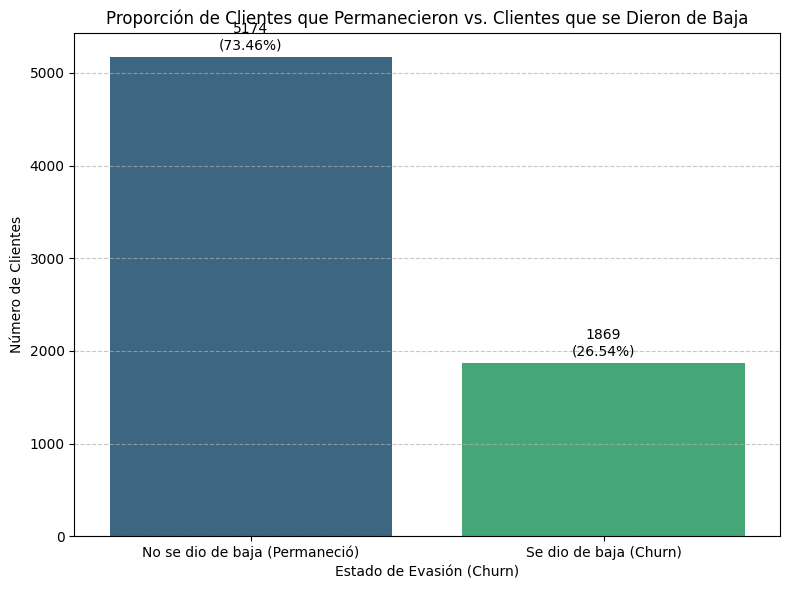
##### **Recuento de evasión por variables categóricas**
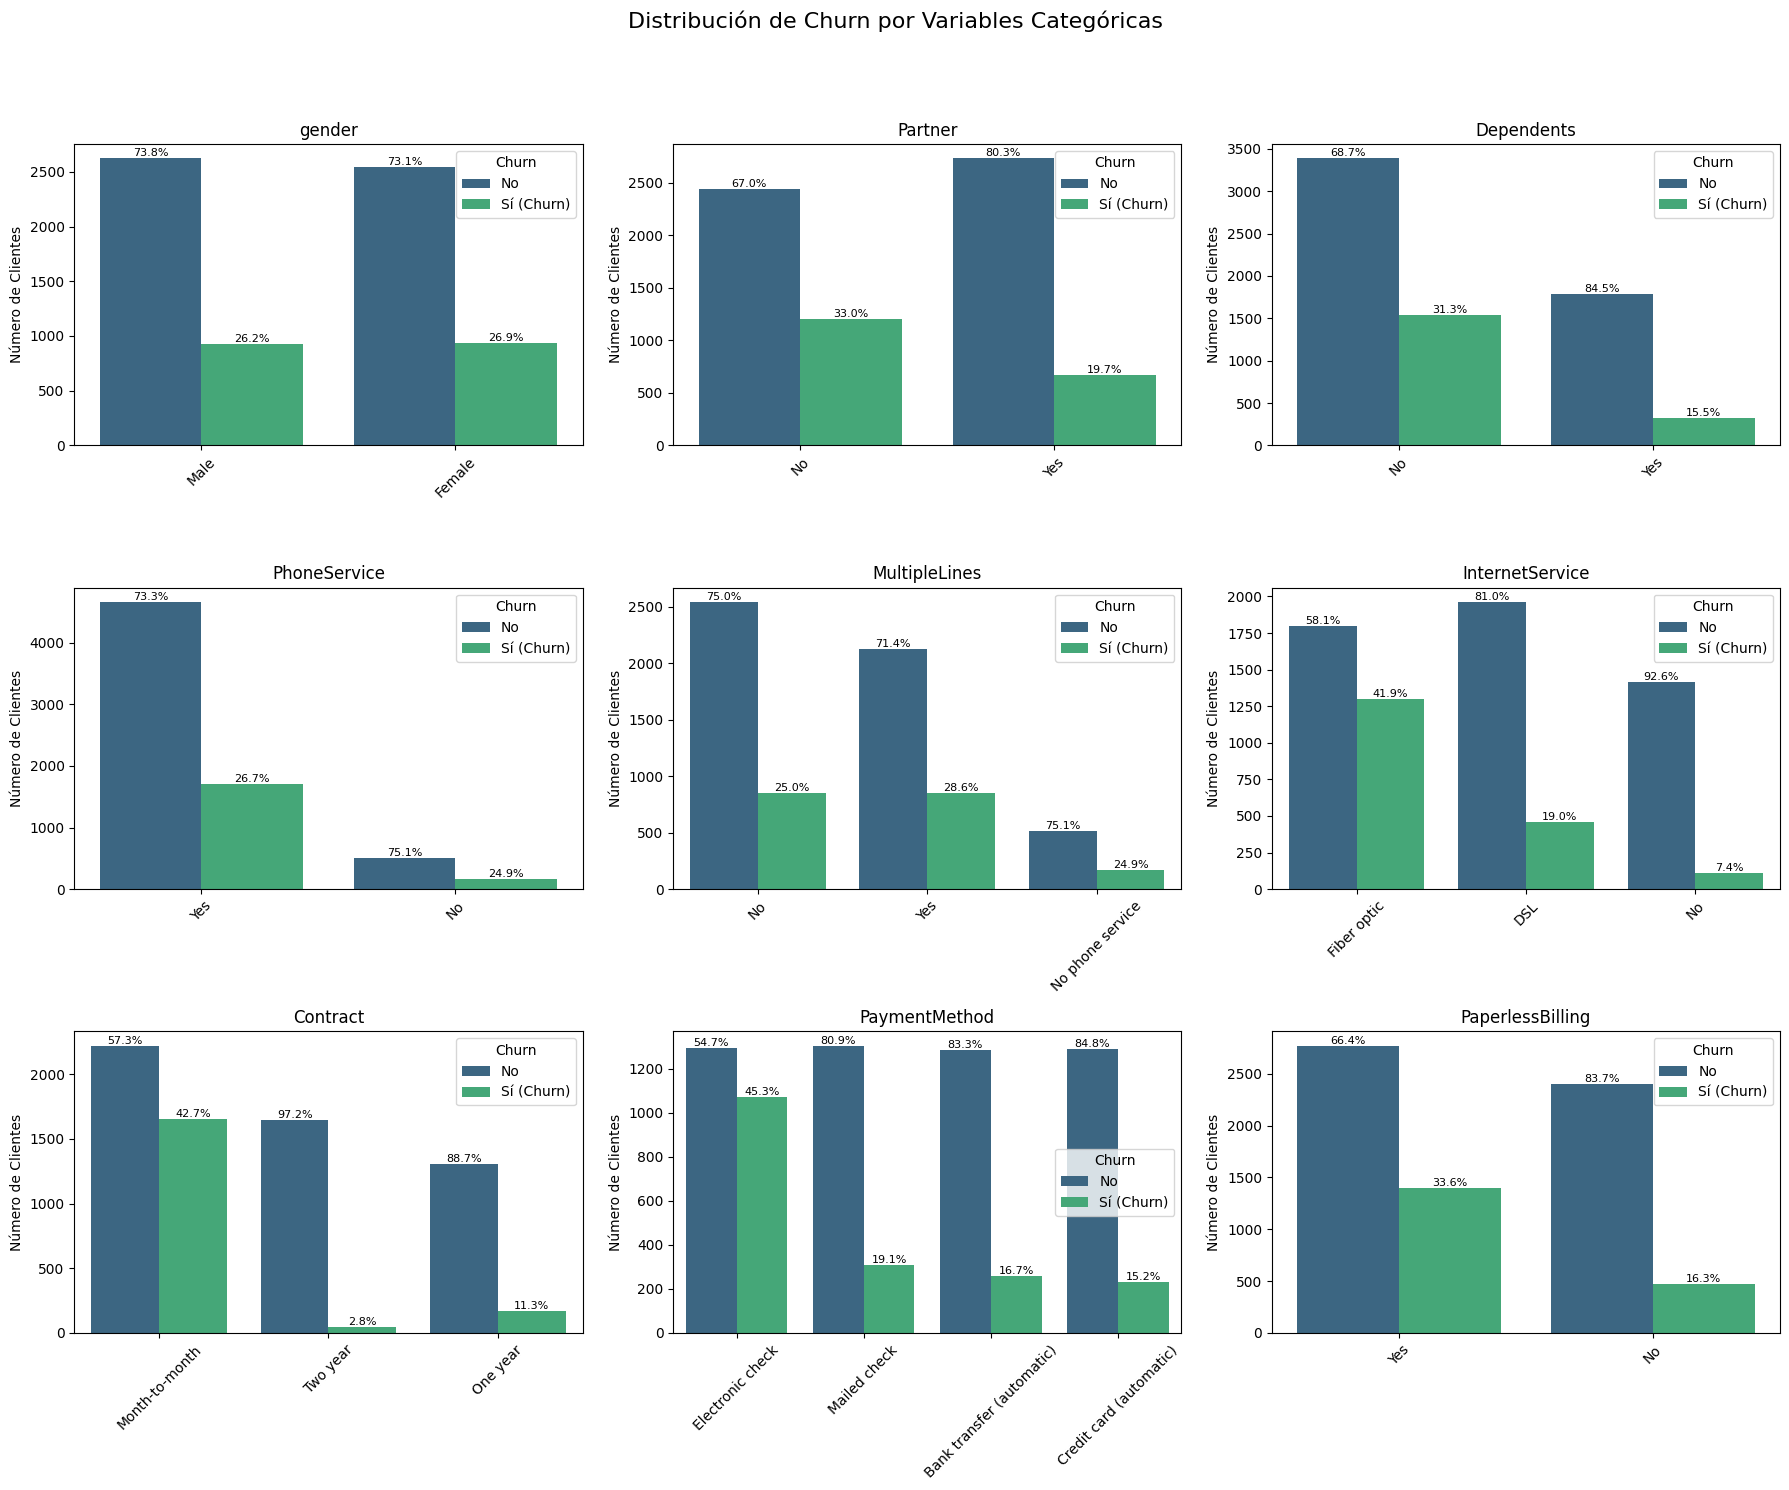
##### **Explorando la distribución de Churn por variables numéricas**
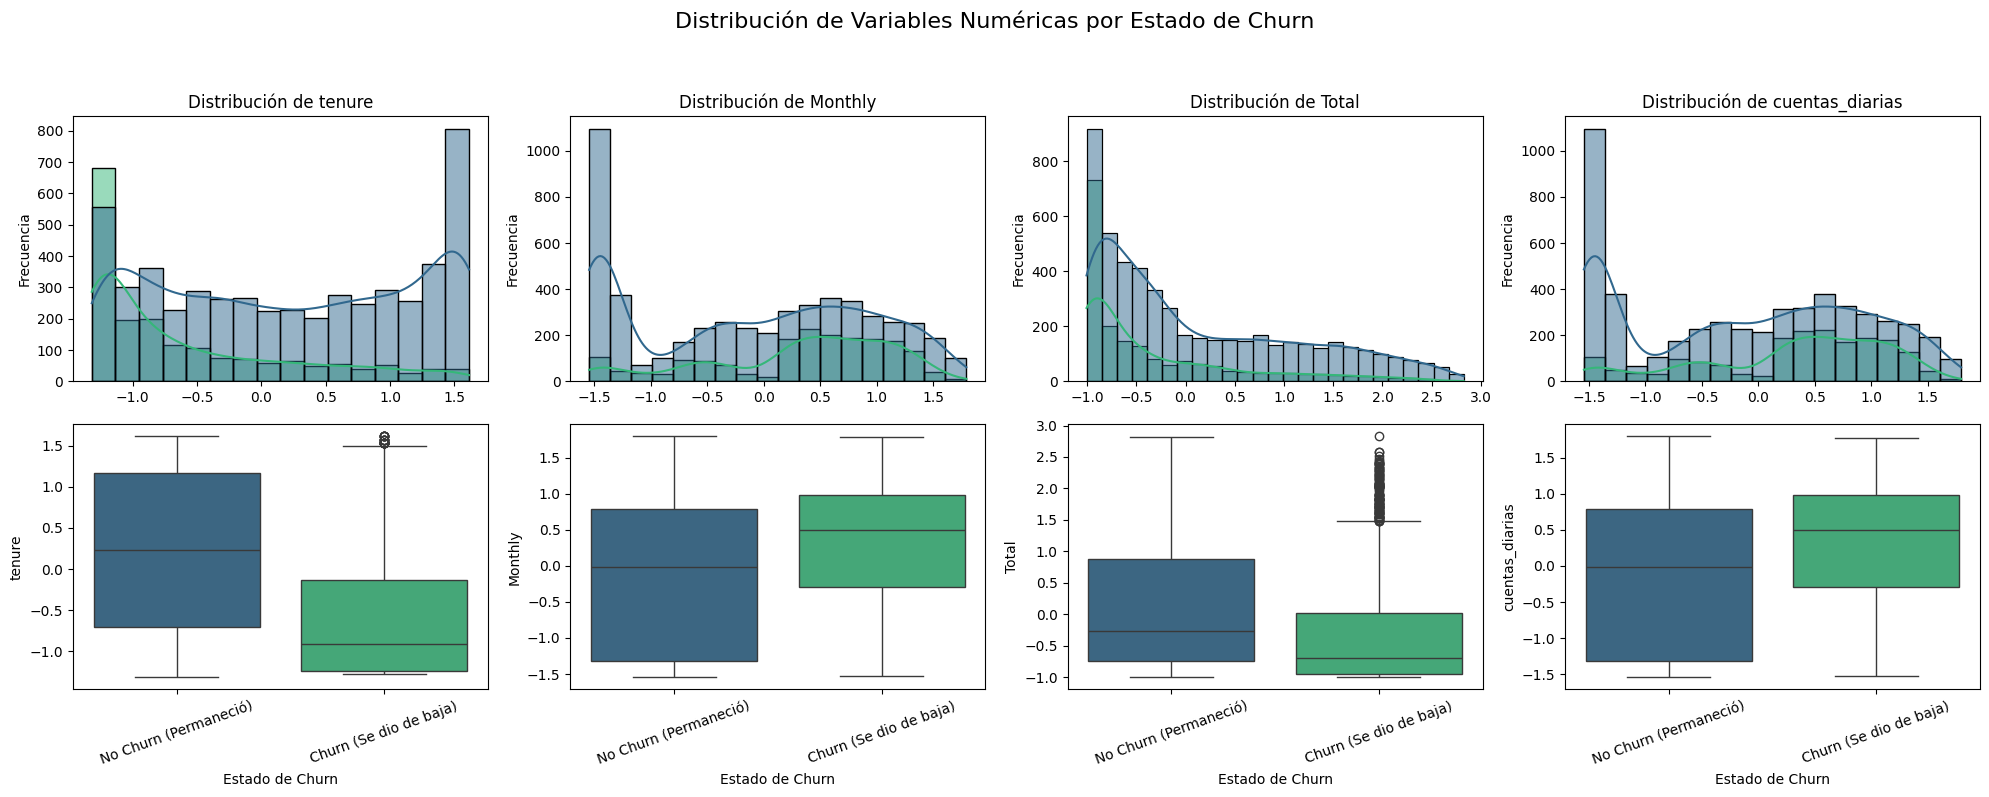

---

#### **◾ Conclusiones e insights**

El análisis exploratorio reveló insights críticos sobre los impulsores del Churn:

* **Clientes Nuevos (Baja Antigüedad):** Los clientes con **menor antigüedad (`tenure`)** demuestran una **marcada mayor propensión a la evasión**. La fase inicial del ciclo de vida del cliente es de alto riesgo.
* **Cargos Elevados vs. Total Gastado Bajo:**
    * Los clientes con **cargos mensuales o diarios (`Monthly`, `cuentas_diarias`) más altos** muestran una **mayor tendencia a la evasión**. Podrían percibir un valor inferior al precio o encontrar mejores ofertas.
    * A pesar de lo anterior, los clientes con **cargos totales (`Total`) bajos** también son propensos al Churn, lo que se alinea con la baja antigüedad y sugiere un menor compromiso inicial con el servicio.
* **Factores Categóricos (Tendencias Observadas):**
    * **Contratos:** Los contratos **mes a mes** exhiben una tasa de Churn significativamente más alta que los de largo plazo.
    * **Servicios Adicionales:** La **ausencia de servicios de seguridad o soporte técnico** parece aumentar la propensión a la evasión.
    * **Métodos de Pago:** Ciertos métodos (ej., cheque electrónico) podrían facilitar la cancelación.

---

#### **◾ Recomendaciones**

Basadas en estos hallazgos, se proponen las siguientes acciones estratégicas:

1.  **Fortalecer el Onboarding y Retención Temprana:**
    * Implementar programas de "bienvenida" proactivos y personalizados en los **primeros 3-6 meses** para clientes nuevos.
    * Ofrecer incentivos para compromisos de **contratos a largo plazo** desde el inicio.
    * Establecer un **monitoreo de riesgo** en clientes con baja `tenure`.

2.  **Revisar Ofertas y Valor Percibido:**
    * Analizar la competitividad de los **planes de alto costo mensual**. Considerar ajustar precios o comunicar más eficazmente el valor de los servicios premium.
    * Explorar paquetes que incentiven un mayor compromiso y uso del servicio para clientes con **bajos cargos totales**.

3.  **Mejorar Experiencia del Servicio:**
    * Promocionar o incluir de forma predeterminada servicios clave como **seguridad online y soporte técnico**, que parecen correlacionarse con una menor evasión.
    * Evaluar la **experiencia de pago** para reducir cualquier fricción en métodos de pago de alto riesgo de Churn.

Estas recomendaciones proporcionan una base sólida para iniciar intervenciones dirigidas a reducir la evasión de clientes y mejorar la retención general.